#### 1. Importing Library's

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

#### 2. Importing CSV data as pandas dataframe

In [3]:
df = pd.read_csv('data/stud.csv')

In [4]:
df.head(10)

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
5,female,group B,associate's degree,standard,none,71,83,78
6,female,group B,some college,standard,completed,88,95,92
7,male,group B,some college,free/reduced,none,40,43,39
8,male,group D,high school,free/reduced,completed,64,64,67
9,female,group B,high school,free/reduced,none,38,60,50


In [5]:
df.shape

(1000, 8)

#### 3. Data Checking 
##### Checking if there are any missing values in data

In [6]:
df.isna().sum()

gender                         0
race_ethnicity                 0
parental_level_of_education    0
lunch                          0
test_preparation_course        0
math_score                     0
reading_score                  0
writing_score                  0
dtype: int64

#### Checking for duplicates

In [7]:
df.duplicated().sum()

0

#### Checking data types

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race_ethnicity               1000 non-null   object
 2   parental_level_of_education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test_preparation_course      1000 non-null   object
 5   math_score                   1000 non-null   int64 
 6   reading_score                1000 non-null   int64 
 7   writing_score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


#### Checking unique entries of each columns


In [9]:
df.nunique()

gender                          2
race_ethnicity                  5
parental_level_of_education     6
lunch                           2
test_preparation_course         2
math_score                     81
reading_score                  72
writing_score                  77
dtype: int64

#### Checking Statistics of the data

In [10]:
df.describe()

,math_score,reading_score,writing_score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


#### Exploring data

In [11]:
print("Categories in 'gender' variable: ", end = " ")
print(df['gender'].unique())

print("Categories in 'race_ethnicity' variable: ", end = " " )
print (df['race_ethnicity'].unique())

print("Categories in 'parental_level_of_education' variable: ", end = " " )
print (df['parental_level_of_education'].unique())

print("Categories in 'lunch' variable: ", end = " " )
print (df['lunch'].unique())

print("Categories in 'test_preparation_course' variable: ", end = " " )
print (df['test_preparation_course'].unique())

Categories in 'gender' variable:  ['female' 'male']
Categories in 'race_ethnicity' variable:  ['group B' 'group C' 'group A' 'group D' 'group E']
Categories in 'parental_level_of_education' variable:  ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
Categories in 'lunch' variable:  ['standard' 'free/reduced']
Categories in 'test_preparation_course' variable:  ['none' 'completed']


#### Identifying numerical and categorical features


In [12]:
numeric_features = [feature for feature in df.columns if df[feature].dtype != 'O']

categorical_features = [feature for feature in df.columns if df[feature].dtype == 'O']

print('{} Numerical features are: {}'.format(len(numeric_features), numeric_features))
print('{} Categorical features are: {}'.format(len(categorical_features), categorical_features))

3 Numerical features are: ['math_score', 'reading_score', 'writing_score']
5 Categorical features are: ['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch', 'test_preparation_course']


#### Adding columns for "total score" and "average" 

In [13]:
df.head(2)

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88


In [14]:
df['total score'] = df['math_score'] + df['reading_score'] + df['writing_score']
df['average'] = df['total score']/3
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,total score,average
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


#### Number of full marks scored in subjects

In [15]:
reading_full = df[df['reading_score'] == 100]['average'].count()
math_full = df[df['math_score'] == 100]['average'].count()
writing_full = df[df['writing_score'] == 100]['average'].count()

print(f'Number of students with full marks in reading: {reading_full}')
print(f'Number of students with full marks in math: {math_full}')
print(f'Number of students with full marks in writing: {writing_full}')


Number of students with full marks in reading: 17
Number of students with full marks in math: 7
Number of students with full marks in writing: 14


In [16]:
reading_less_20 = df[df['reading_score'] <=20]['average'].count()
math_less_20 = df[df['math_score'] <=20]['average'].count()
writing_less_20 = df[df['writing_score'] <=20]['average'].count()

print(f'Number of students with less then 20 marks in reading: {reading_less_20}')
print(f'Number of students with less then 20 marks in math: {math_less_20}')
print(f'Number of students with less then 20 marks in writing: {writing_less_20}')

Number of students with less then 20 marks in reading: 1
Number of students with less then 20 marks in math: 4
Number of students with less then 20 marks in writing: 3


 From above values we get to know that the students had performed best in reading and worst in maths.


### 4. Exploring the Data


#### Histogram and KDE for average score

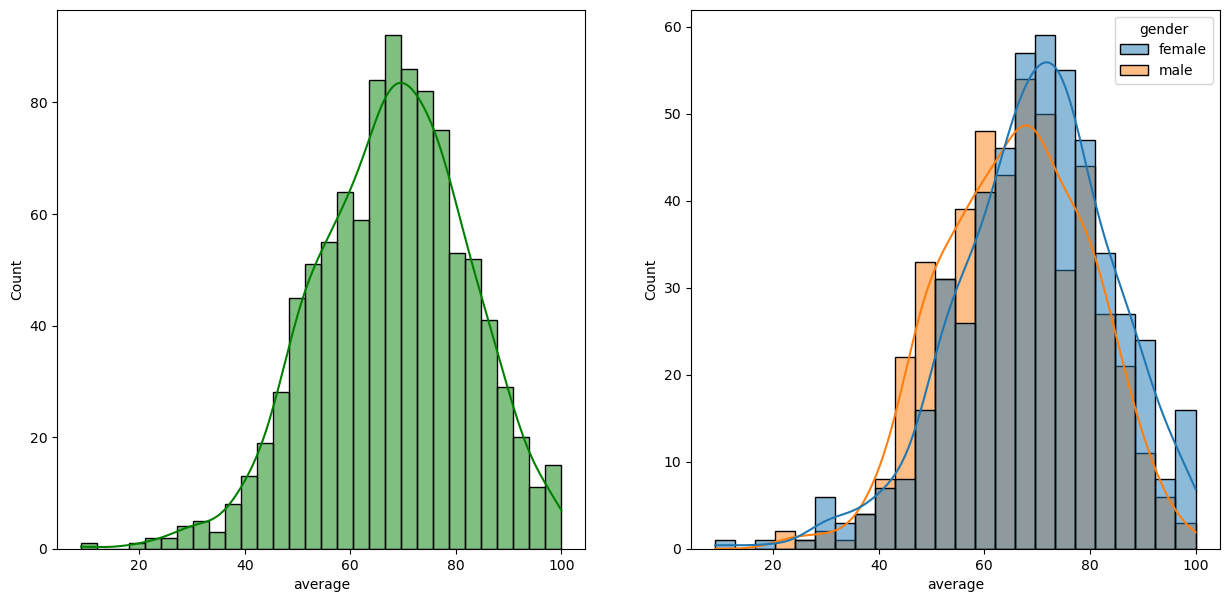

In [17]:
fig, axs = plt.subplots(1, 2, figsize = (15, 7))
plt.subplot(121)
sns.histplot(data=df, x='average', bins=30, kde=True, color='g')
plt.subplot(122)
sns.histplot(data=df, x='average', kde=True, hue='gender')
plt.show()

#### Histogram with KDE for Total score

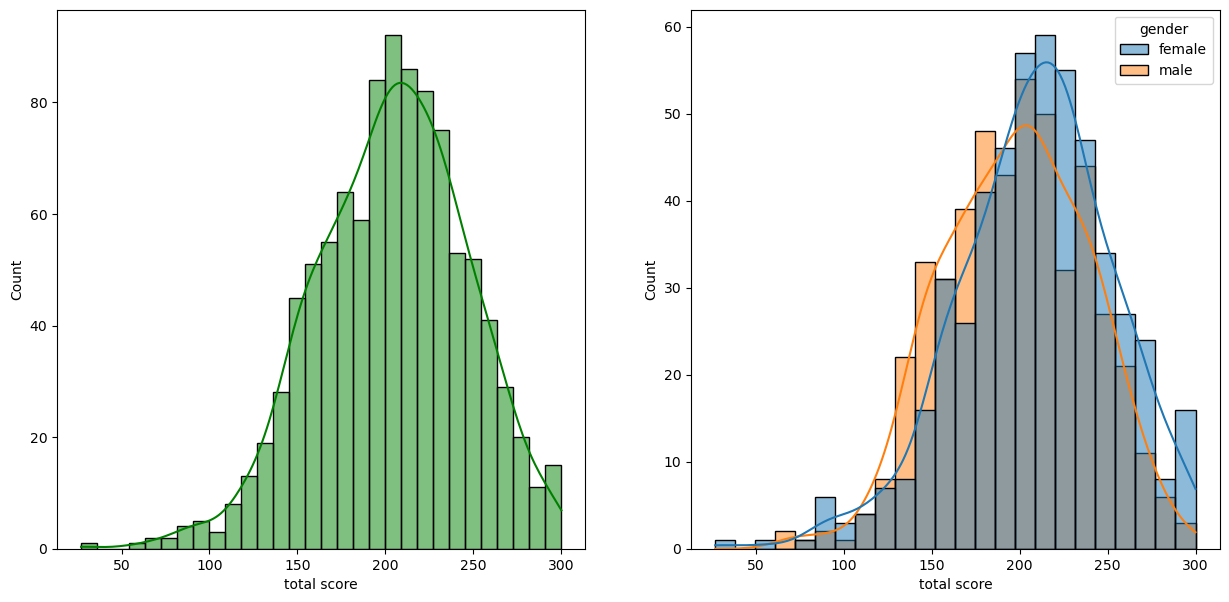

In [18]:
fig, axs = plt.subplots(1,2, figsize=(15,7))
plt.subplot(121)
sns.histplot(data=df, x='total score', bins=30, kde=True, color='g')
plt.subplot(122)
sns.histplot(data=df, x='total score', kde=True, hue='gender')
plt.show()

#### Insight
- Female students perform well then male students

##### Histogram with KDE to understand how lunch affect the average score

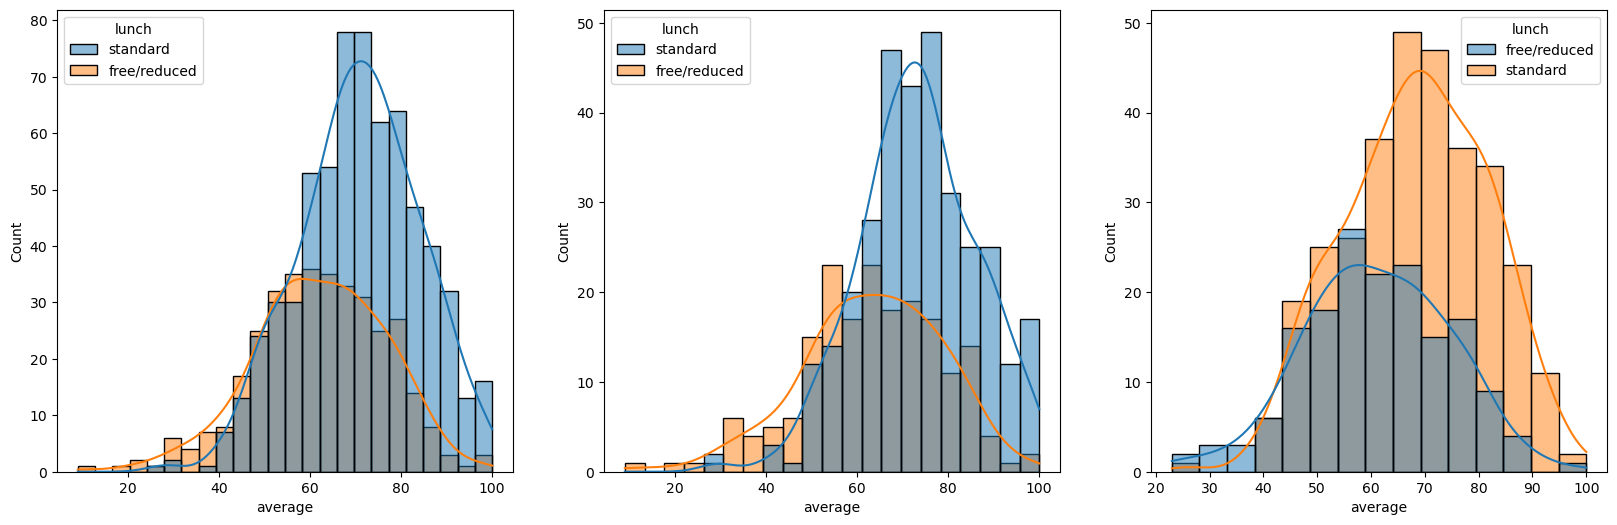

In [19]:
plt.subplots(1,3, figsize=(20,6))
plt.subplot(131)
sns.histplot(data=df, x='average', kde=True, hue='lunch')
plt.subplot(132)
sns.histplot(data=df[df.gender=='female'], x='average', kde=True, hue='lunch')
plt.subplot(133)
sns.histplot(data=df[df.gender == 'male'], x='average', kde= True, hue='lunch')
plt.show()

#### Insight
- It seems that Standard lunch helps student perform well.
- The Standard lunch helps both male and female to perform well.

##### Histogram with KDE to understand how parental level of education affect their kids scores

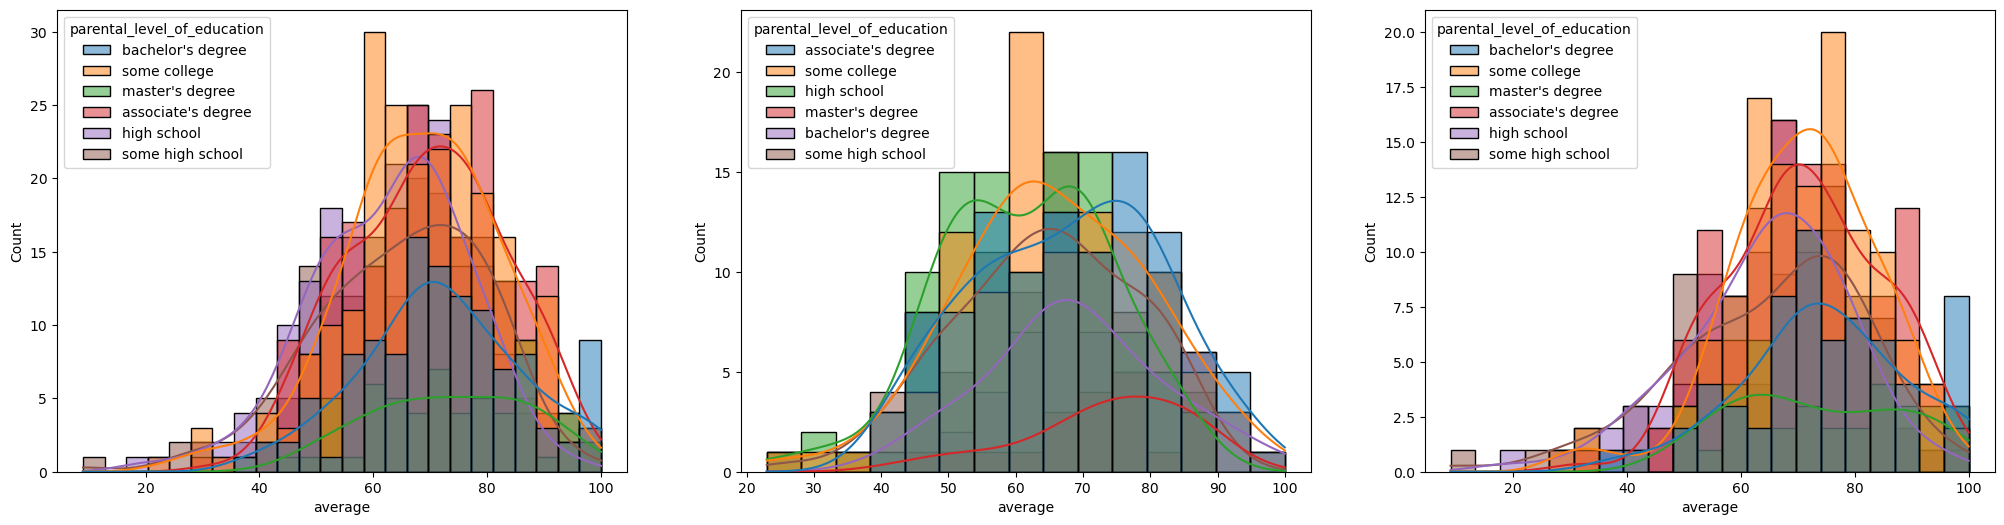

In [20]:
plt.subplots(1,3, figsize=(25,6))
plt.subplot(131)
sns.histplot(data=df, x='average', kde=True, hue='parental_level_of_education')
plt.subplot(132)
sns.histplot(data=df[df.gender=='male'], x='average', kde=True, hue='parental_level_of_education')
plt.subplot(133)
sns.histplot(data=df[df.gender=='female'], x='average', kde=True, hue='parental_level_of_education')

plt.show()

#### Insight
- In general it can be observed that the parents level of education don't help the student peroform well in exam.
- in the second histogram it can be observed that the male student's are performing well whose parents have education level of associate's degree.
- In the third histogram the parent's level of education has no affect on the female student's performance.

#### Histogram with KDE to understand the performance of student with respect to their race/ethnicity

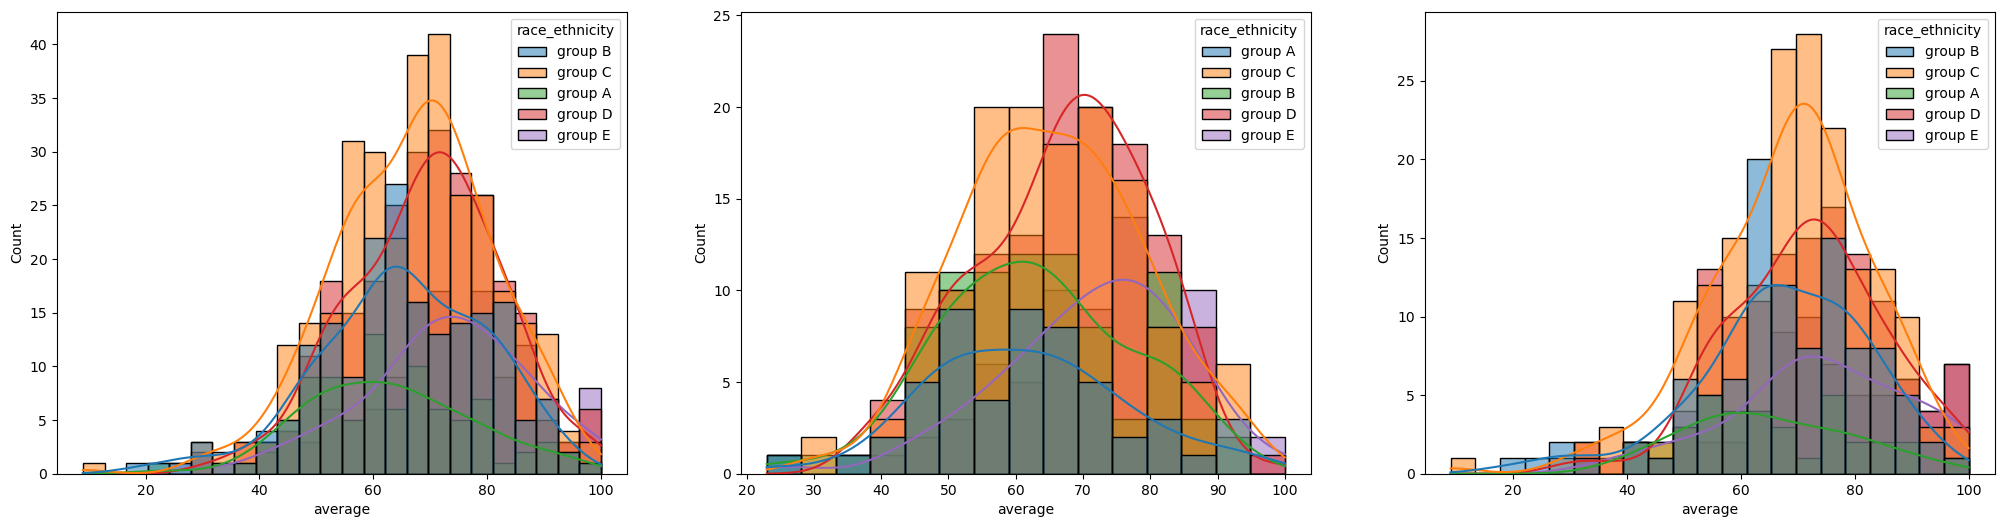

In [21]:
plt.subplots(1, 3, figsize=(25, 6))
plt.subplot(131)
sns.histplot(data=df, x='average', kde=True, hue='race_ethnicity')
plt.subplot(132)
sns.histplot(data=df[df.gender=='male'], x='average', kde=True, hue='race_ethnicity')
plt.subplot(133)
sns.histplot(data=df[df.gender=='female'], x='average', kde=True, hue='race_ethnicity')
plt.show()

#### Insight 
- Students of group A and group E performs poorly in exams.

#### Observing the maximum amount of score in all subject

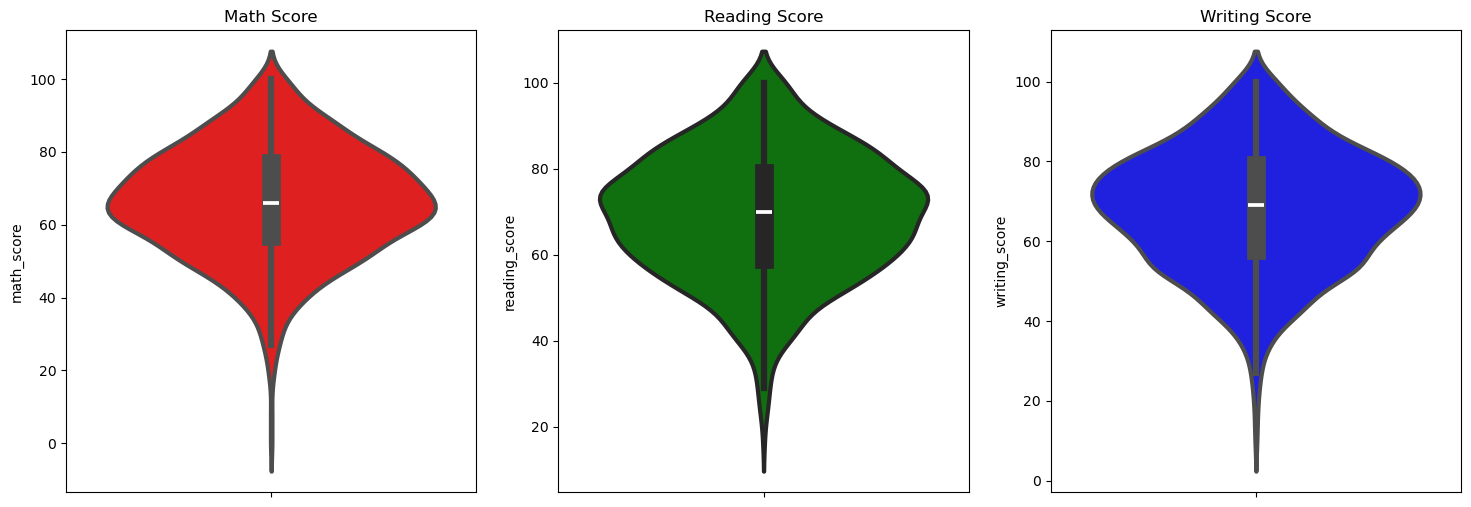

In [22]:
plt.figure(figsize=(18,6))

plt.subplot(1,3,1)
plt.title("Math Score")
sns.violinplot(data=df, y='math_score', color='red', linewidth=3)

plt.subplot(1,3,2)
plt.title("Reading Score")
sns.violinplot(data=df, y='reading_score', color='green', linewidth=3)

plt.subplot(1,3,3)
plt.title("Writing Score")
sns.violinplot(data=df, y='writing_score', color='blue', linewidth=3)

plt.show()

#### Insight
- It can be observed that students has scored the most marks in the range of 60-80 marks range.

#### Analysis using pieplot

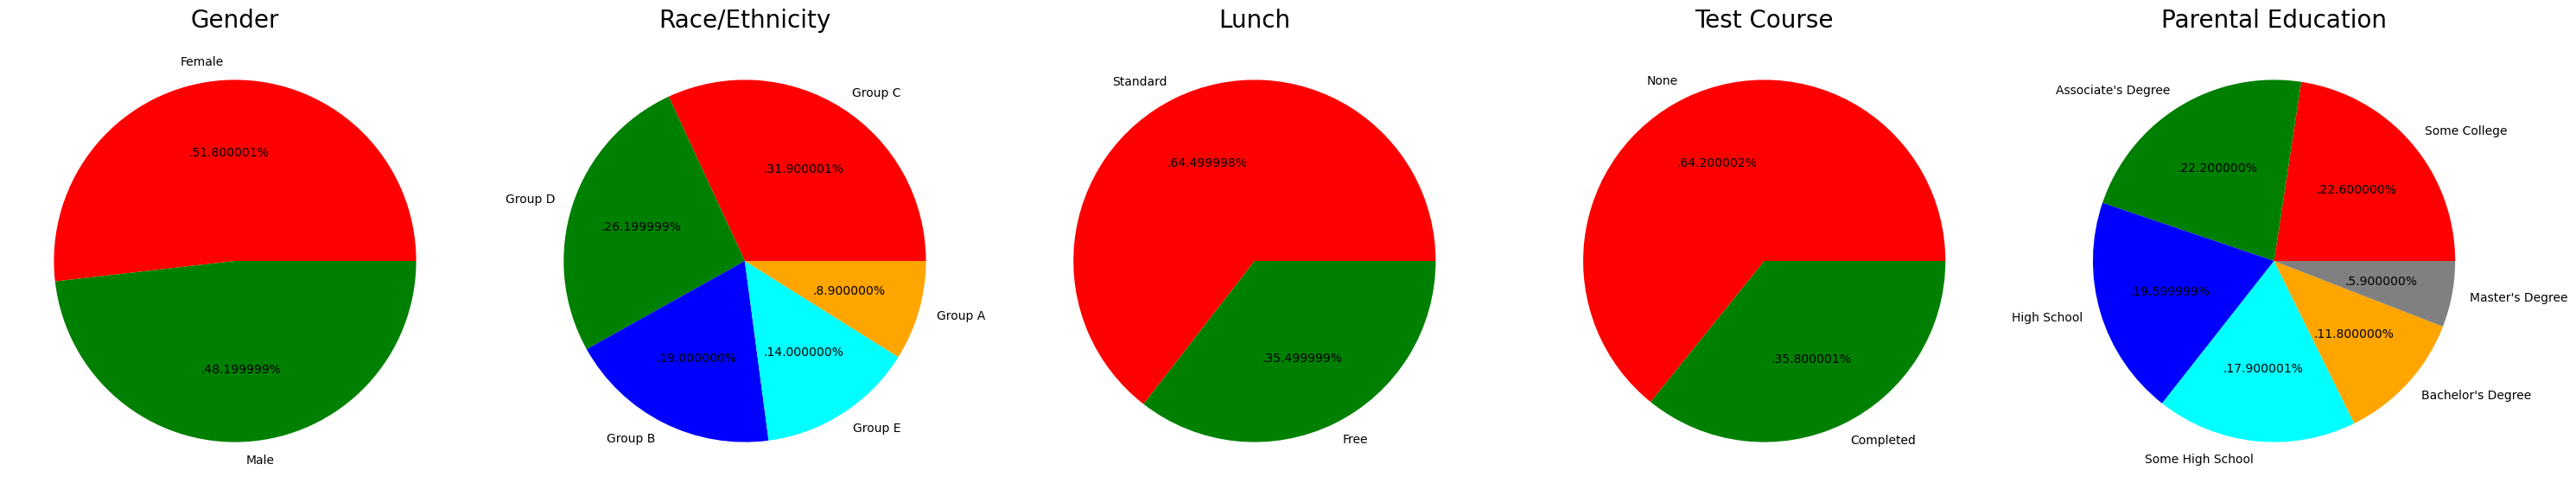

In [23]:
plt.rcParams['figure.figsize'] = (30,12)

plt.subplot(1,5,1)
size = df['gender'].value_counts()
lables = 'Female', 'Male'
color = ['red', 'green']

plt.pie(size, colors=color, labels=lables, autopct= '.%2f%%')
plt.title('Gender', fontsize=20)
plt.axis('off')

plt.subplot(1,5,2)
size = df['race_ethnicity'].value_counts()
labels = 'Group C', 'Group D', 'Group B', 'Group E', 'Group A'
color = ['red', 'green', 'blue', 'cyan', 'orange']

plt.pie(size, labels=labels, colors=color, autopct='.%2f%%')
plt.title('Race/Ethnicity', fontsize=20)
plt.axis('off')

plt.subplot(1, 5, 3)
size = df['lunch'].value_counts()
labels = 'Standard', 'Free'
color = ['red','green']

plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('Lunch', fontsize = 20)
plt.axis('off')


plt.subplot(1, 5, 4)
size = df['test_preparation_course'].value_counts()
labels = 'None', 'Completed'
color = ['red','green']

plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('Test Course', fontsize = 20)
plt.axis('off')


plt.subplot(1, 5, 5)
size = df['parental_level_of_education'].value_counts()
labels = 'Some College', "Associate's Degree",'High School','Some High School',"Bachelor's Degree","Master's Degree"
color = ['red', 'green', 'blue', 'cyan','orange','grey']

plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('Parental Education', fontsize = 20)
plt.axis('off')


plt.tight_layout()
plt.grid()

plt.show()

#### Insight
- Both Male and Female seems to be equal.
- The number of students from Group C Race/Ethnicity seems to be most.
- Most students seems to have Standard Lunch.
- Most students have no test preparation courses.
- Most student's parents have Some Collage or Associate's Degree as education level.

#### 5. Feature Wise Visualization
#### GENDER COLUMN

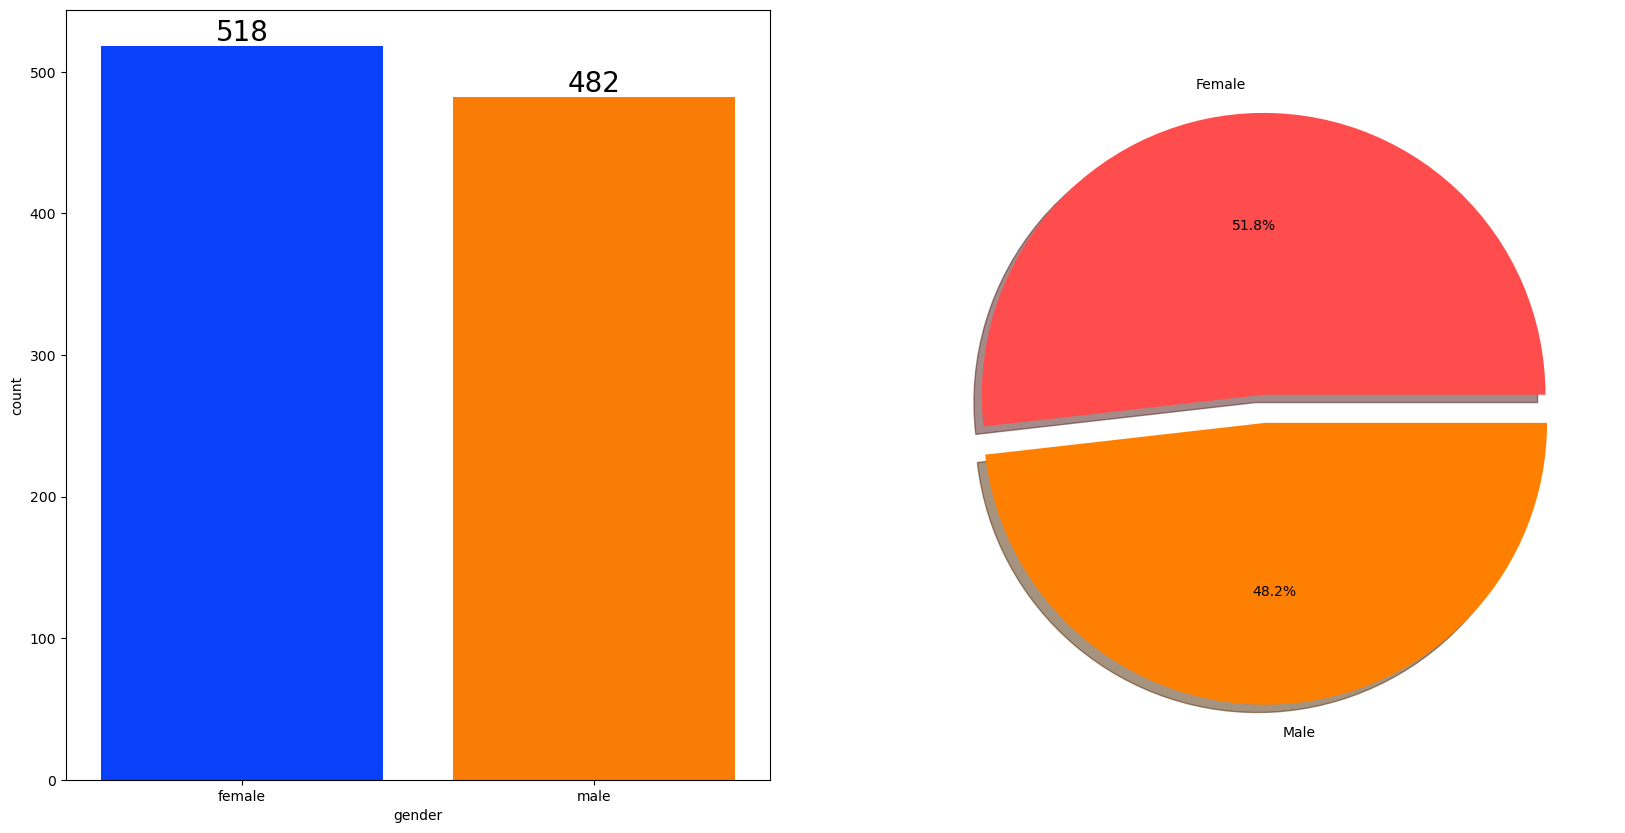

In [24]:
f,ax=plt.subplots(1,2,figsize=(20,10))
sns.countplot(x=df['gender'],data=df,palette ='bright',ax=ax[0],saturation=0.95)
for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=20)
    
plt.pie(x=df['gender'].value_counts(),labels=['Female','Male'],explode=[0,0.1],autopct='%1.1f%%',shadow=True,colors=['#ff4d4d','#ff8000'])
plt.show()

#### Insight
- The Gender has balanced data with 518 female studens (51.8%) and 482 male students (48.2%).

#### BIVARIATE ANALYSIS (Obsereving if the gender has any impact on the performence of studens)

In [25]:
gender_group = df.groupby('gender').mean(numeric_only=True)
gender_group

,math_score,reading_score,writing_score,total score,average
gender,,,,,
female,63.633205,72.608108,72.467181,208.708494,69.569498
male,68.728216,65.473029,63.311203,197.512448,65.837483


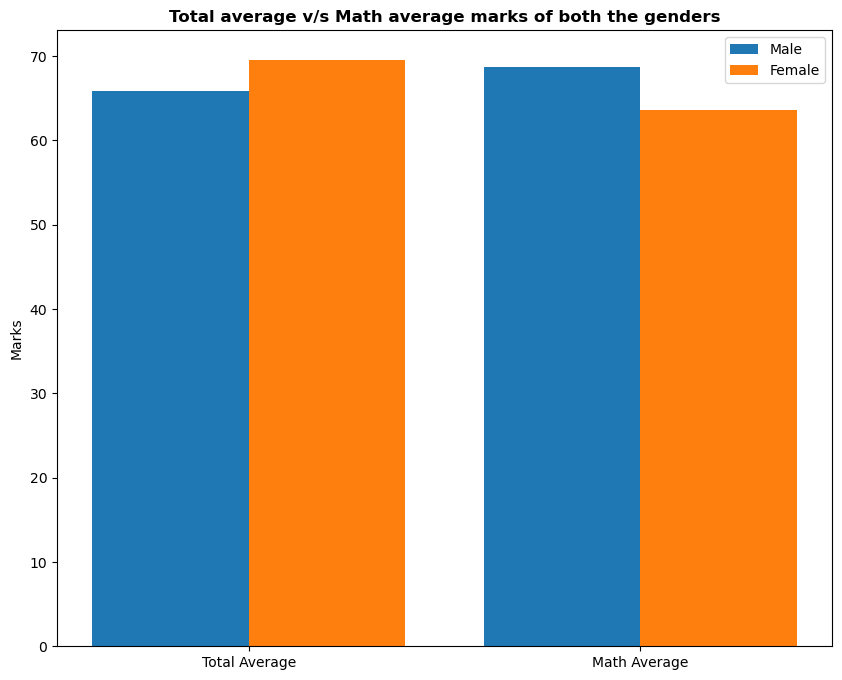

In [26]:
plt.figure(figsize=(10, 8))

X = ['Total Average','Math Average']


female_scores = [gender_group['average'][0], gender_group['math_score'][0]]
male_scores = [gender_group['average'][1], gender_group['math_score'][1]]

X_axis = np.arange(len(X))
  
plt.bar(X_axis - 0.2, male_scores, 0.4, label = 'Male')
plt.bar(X_axis + 0.2, female_scores, 0.4, label = 'Female')
  
plt.xticks(X_axis, X)
plt.ylabel("Marks")
plt.title("Total average v/s Math average marks of both the genders", fontweight='bold')
plt.legend()
plt.show()

#### Insight
- In the Total Average score females students have overall performed well as compared to the male students.
- Whereas in the Math Average score male students seems to perform better.

#### RACE/EHNICITY COLUMN (Univariate analysis)

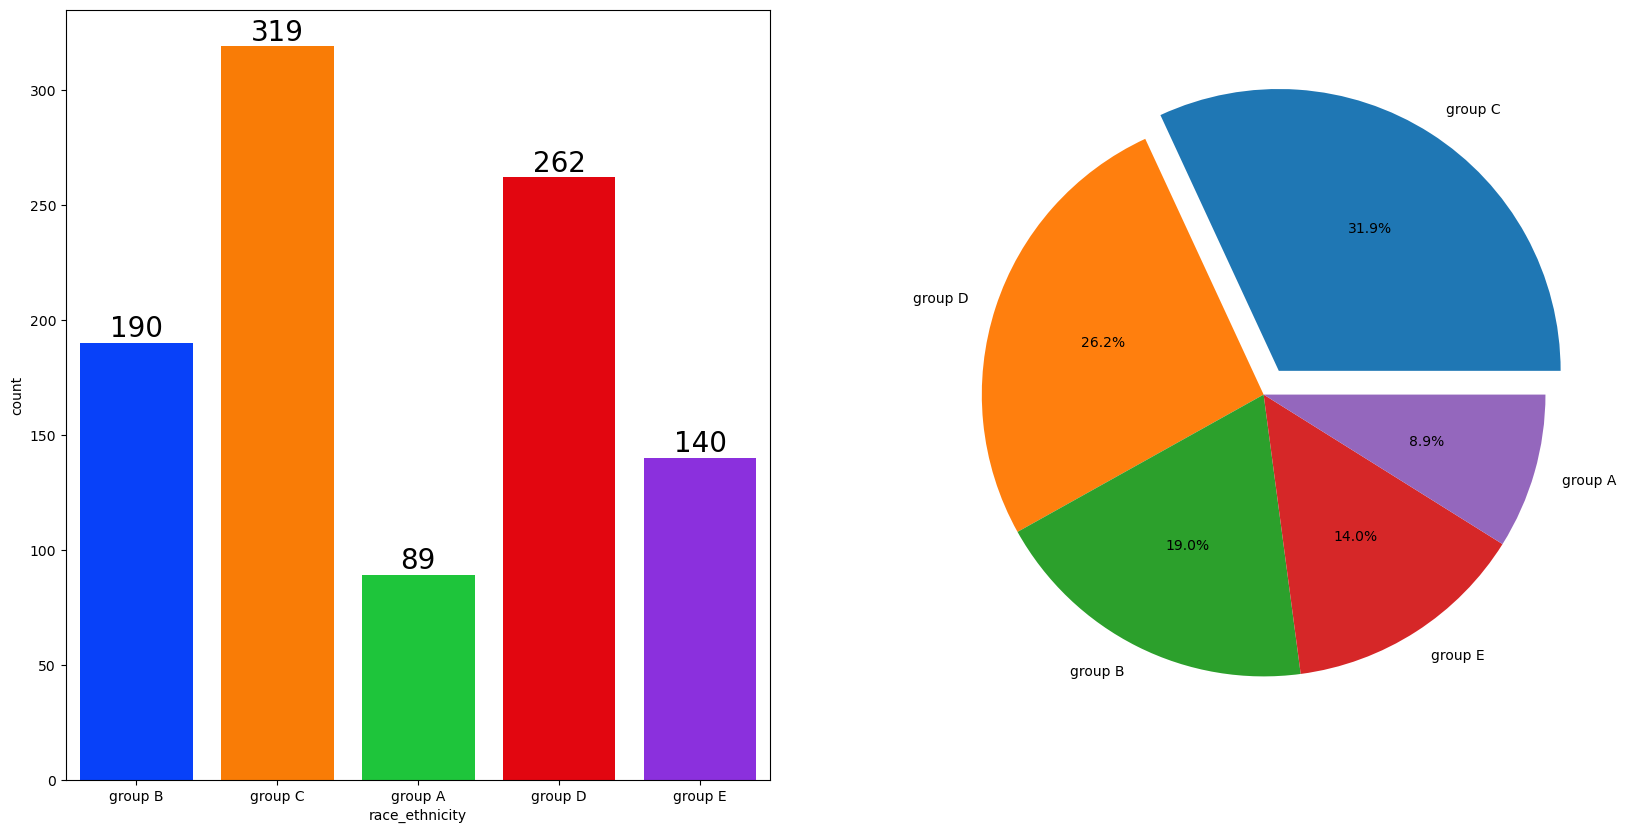

In [27]:
f,ax=plt.subplots(1,2,figsize=(20,10))
sns.countplot(x='race_ethnicity',data=df,palette = 'bright',ax=ax[0],saturation=0.95)
for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=20)
    
plt.pie(x = df['race_ethnicity'].value_counts(),labels=df['race_ethnicity'].value_counts().index,explode=[0.1,0,0,0,0],autopct='%.1f%%')
plt.show()   

#### Insight
- Most students seems to belong to Group C and D.
- Lowest number of students are from Group A


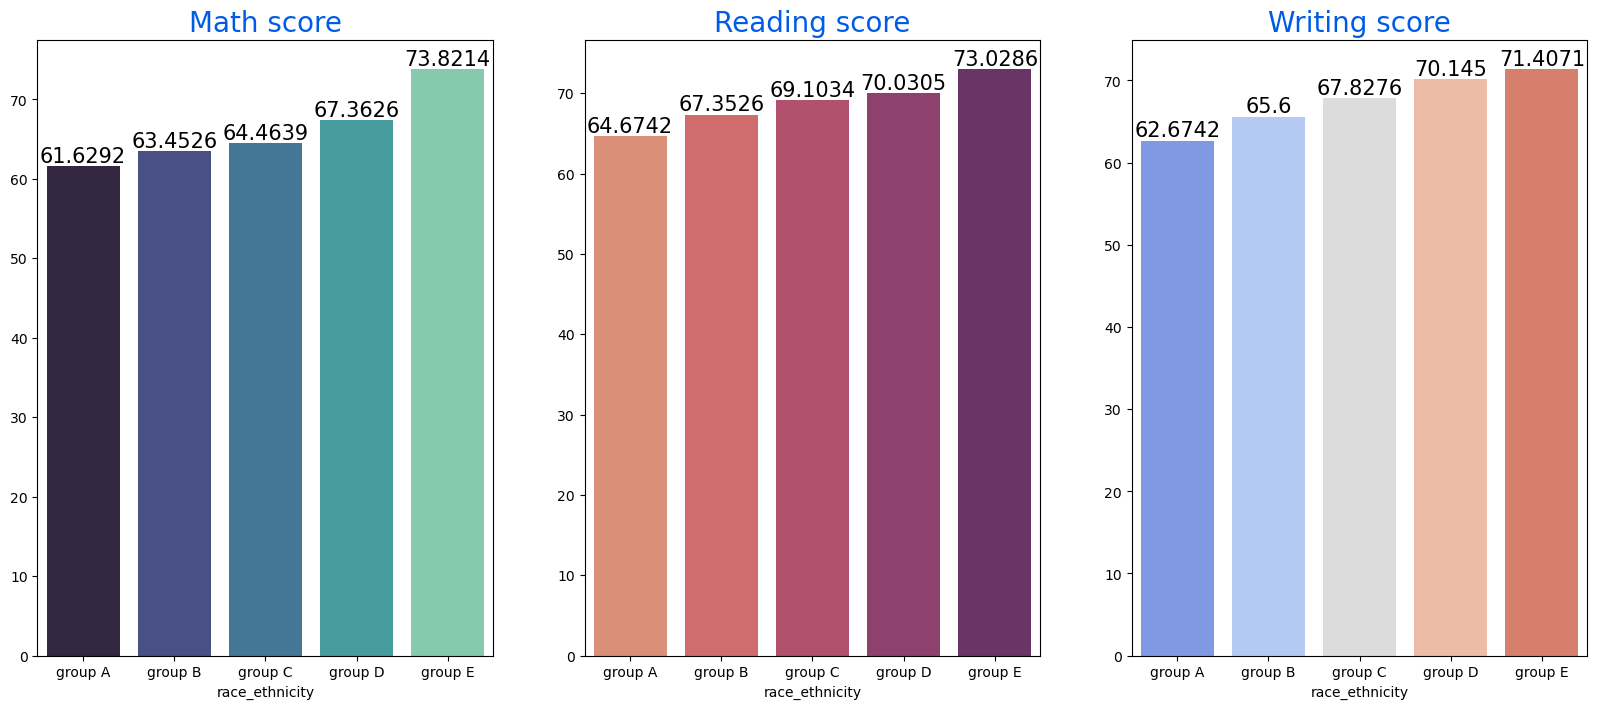

In [28]:
Group_data2=df.groupby('race_ethnicity')
f,ax=plt.subplots(1,3,figsize=(20,8))
sns.barplot(x=Group_data2['math_score'].mean().index,y=Group_data2['math_score'].mean().values,palette = 'mako',ax=ax[0])
ax[0].set_title('Math score',color='#005ce6',size=20)

for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=15)

sns.barplot(x=Group_data2['reading_score'].mean().index,y=Group_data2['reading_score'].mean().values,palette = 'flare',ax=ax[1])
ax[1].set_title('Reading score',color='#005ce6',size=20)

for container in ax[1].containers:
    ax[1].bar_label(container,color='black',size=15)

sns.barplot(x=Group_data2['writing_score'].mean().index,y=Group_data2['writing_score'].mean().values,palette = 'coolwarm',ax=ax[2])
ax[2].set_title('Writing score',color='#005ce6',size=20)

for container in ax[2].containers:
    ax[2].bar_label(container,color='black',size=15)

plt.show()

#### Insight
- The students from Group E has scored highest.
- The students from Group A has scored lowest.
- As the Group A to Group E the performance seems to be increasing.


#### UNIVARIATE ANALYSIS


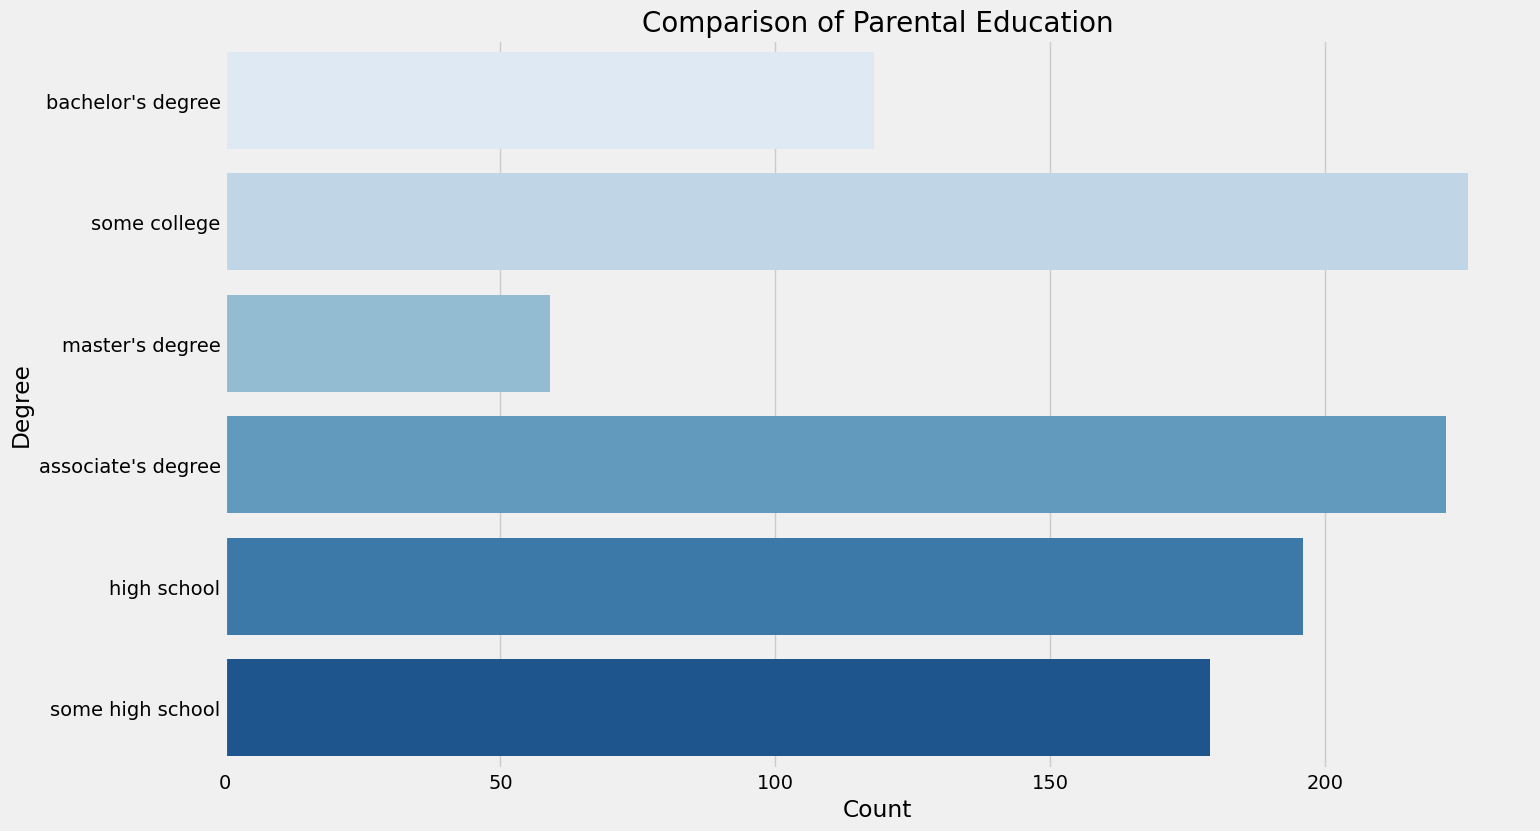

In [29]:
plt.rcParams['figure.figsize'] = (15, 9)
plt.style.use('fivethirtyeight')
sns.countplot(df['parental_level_of_education'], palette = 'Blues')
plt.title('Comparison of Parental Education', fontweight = 30, fontsize = 20)
plt.xlabel('Count')
plt.ylabel('Degree')
plt.show()

#### Insight
- Most of the student's parents have their degree from some college

#### BIVARIATE ANALYSIS (Checking if parent's education has any impact on the children's education)

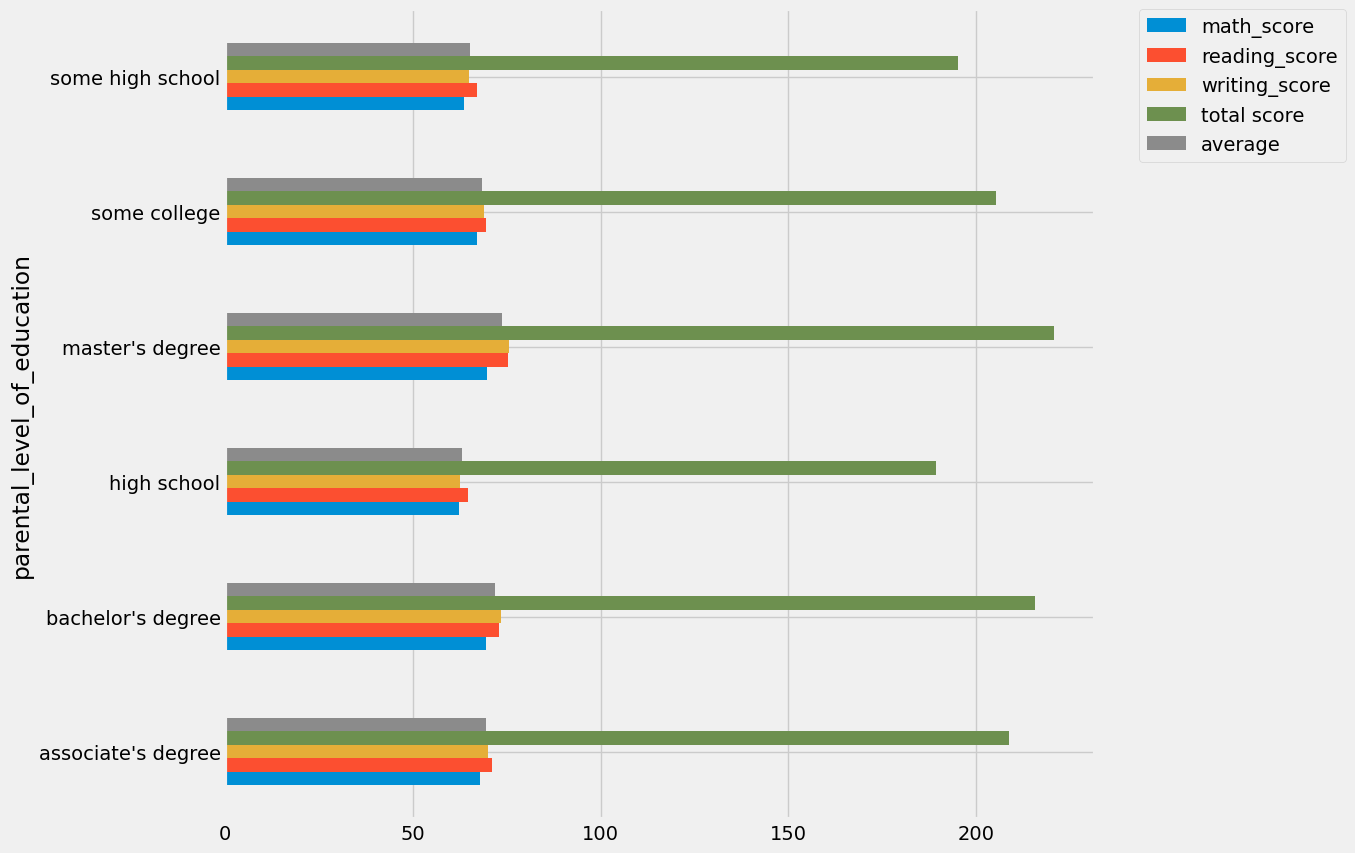

In [30]:
df.groupby('parental_level_of_education').mean(numeric_only=True).plot(kind='barh', figsize=(10, 10))
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

### Insight
- The students whose parents have master's and bachelor's degree seems to have scored most.

#### UNIVARIATE ANALYSIS (Comparing which food is most common amoung students)

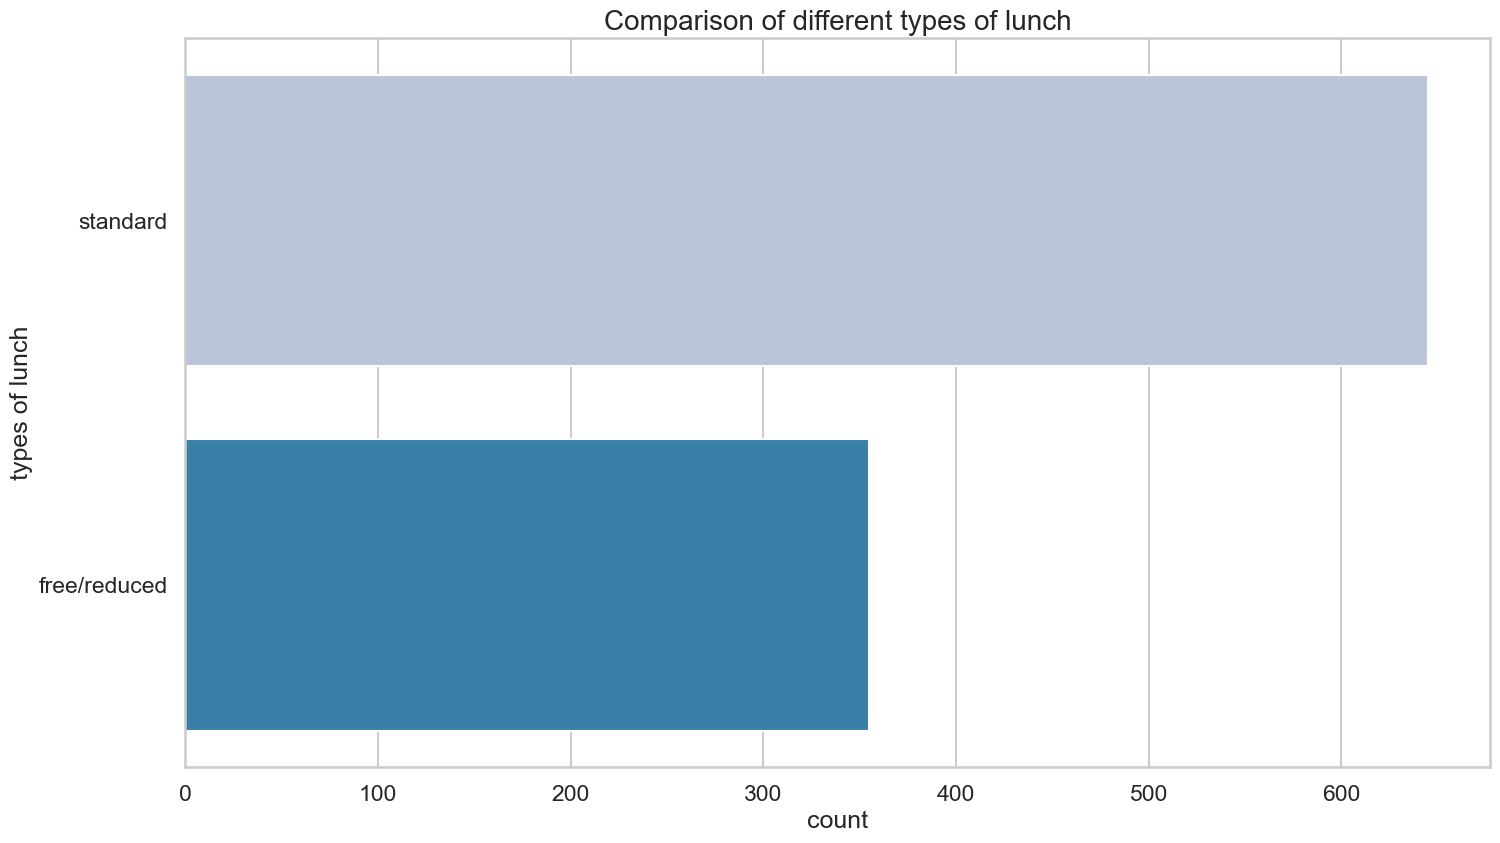

In [31]:
plt.rcParams['figure.figsize'] = (15, 9)
sns.set_theme(style='whitegrid')
sns.set_context('talk')
sns.countplot(df['lunch'], palette = 'PuBu')
plt.title('Comparison of different types of lunch', fontweight = 30, fontsize = 20)
plt.ylabel('types of lunch')
plt.xlabel('count')
plt.show()

#### Insight
- Most student seems to consume standard food

#### BIVARIATE ANALYSIS (analysing if the parents level of education has any impact of the students lunch or test preparation)

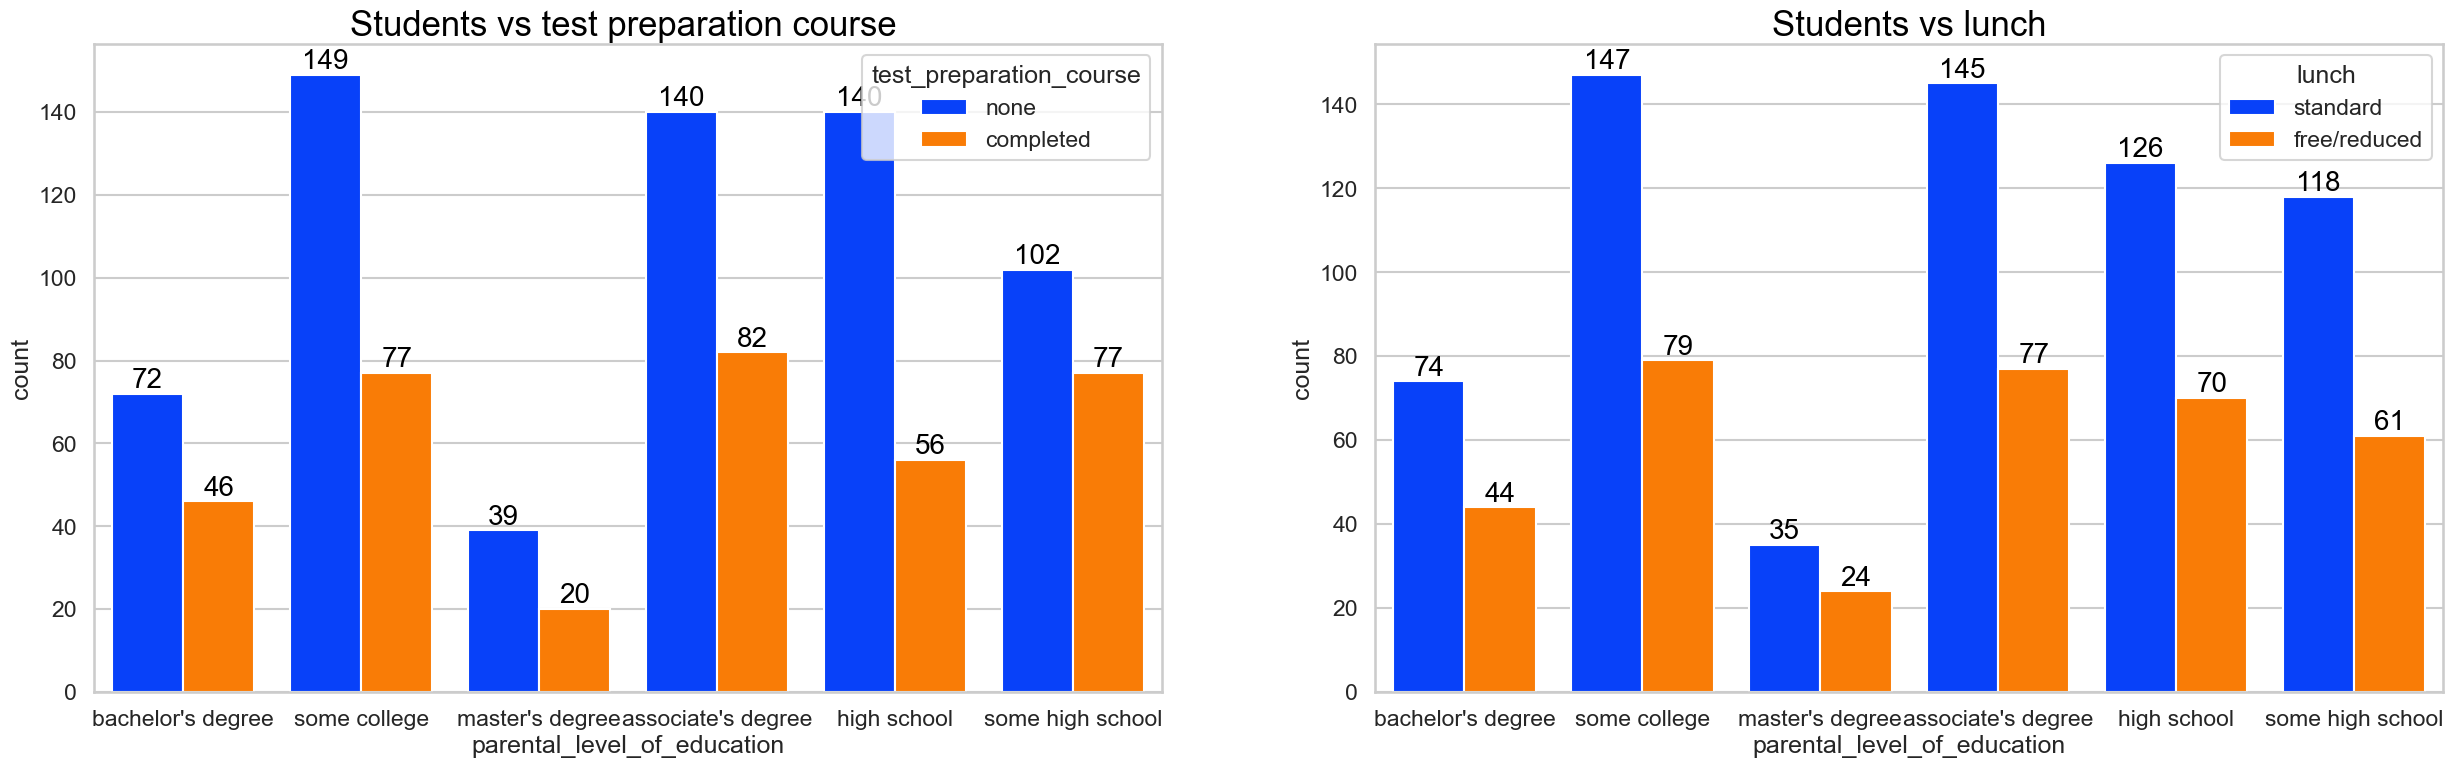

In [32]:
f,ax=plt.subplots(1,2,figsize=(27,8))
sns.countplot(x=df['parental_level_of_education'],data=df,palette = 'bright',hue='test_preparation_course',saturation=0.95,ax=ax[0])
ax[0].set_title('Students vs test preparation course ',color='black',size=25)
for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=20)
    
sns.countplot(x=df['parental_level_of_education'],data=df,palette = 'bright',hue='lunch',saturation=0.95,ax=ax[1])
ax[1].set_title('Students vs lunch',color='black',size=25)
for container in ax[1].containers:
    ax[1].bar_label(container,color='black',size=20)  

plt.show() 

#### BIVARIATE ANALYSIS ( Checking if the Test prepration course has any impact on student's performance ? )

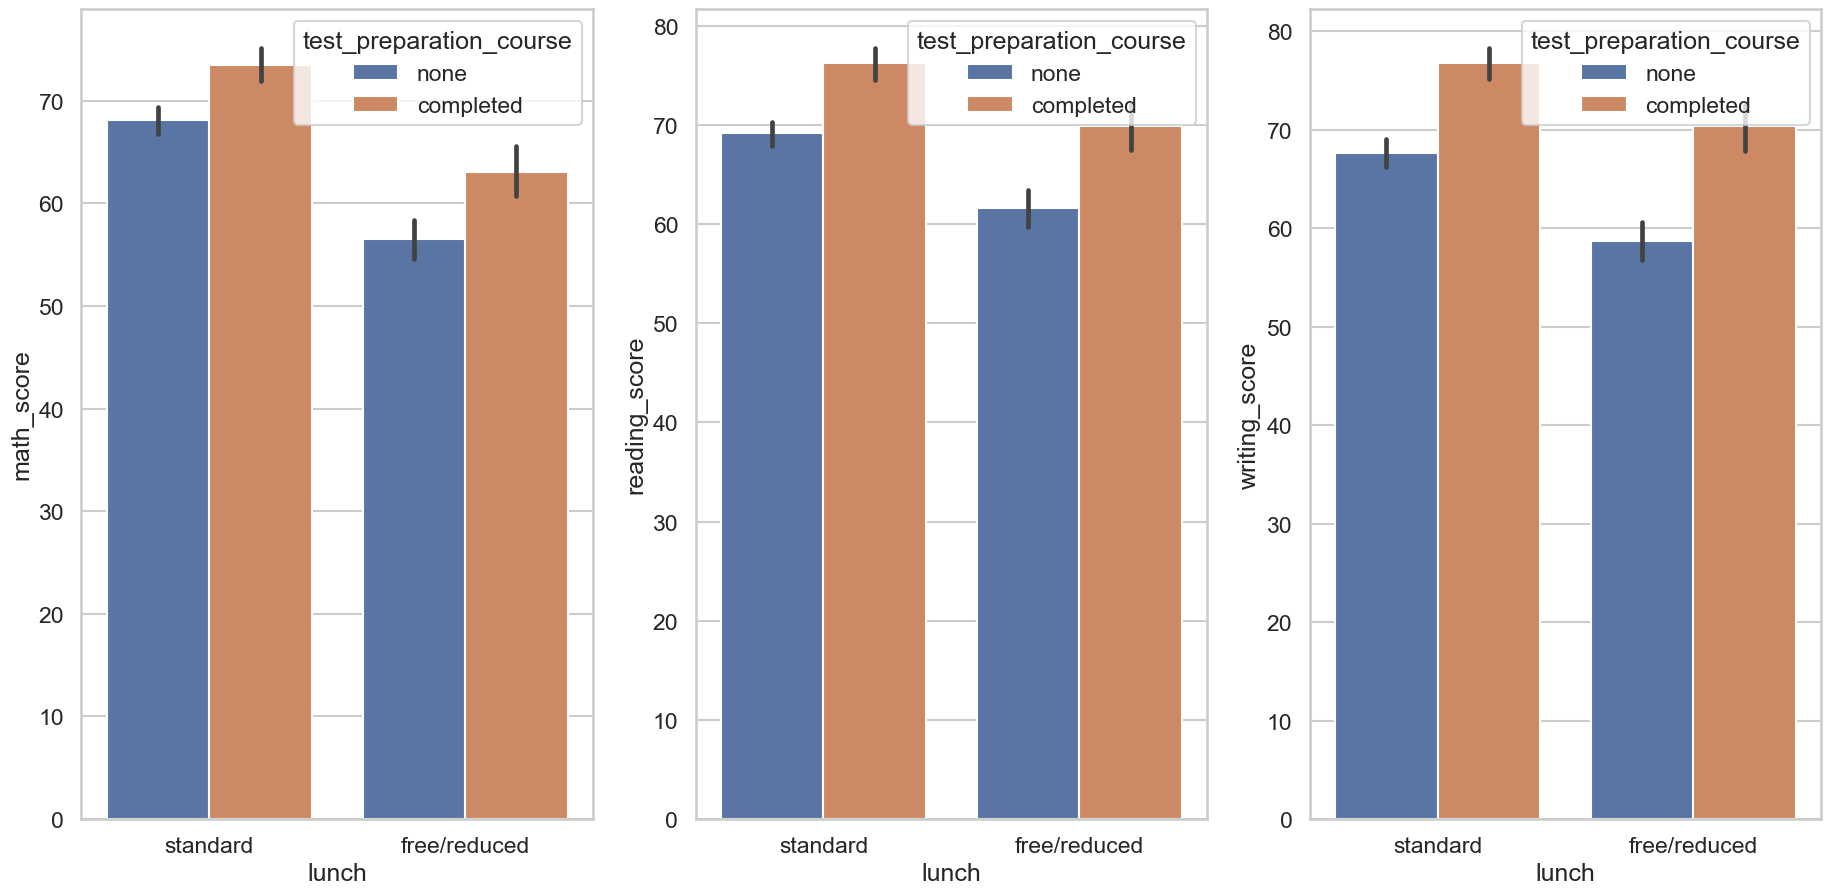

In [33]:
plt.figure(figsize=(20,10))
plt.subplot(1,3,1)
sns.barplot (x=df['lunch'], y=df['math_score'], hue=df['test_preparation_course'])
plt.subplot(1,3,2)
sns.barplot (x=df['lunch'], y=df['reading_score'], hue=df['test_preparation_course'])
plt.subplot(1,3,3)
sns.barplot (x=df['lunch'], y=df['writing_score'], hue=df['test_preparation_course'])
plt.show()

#### Insight
- The students who has completed test preparation course seems to perfrom well in all thre exam scores

#### CHECKING OUTLIERS

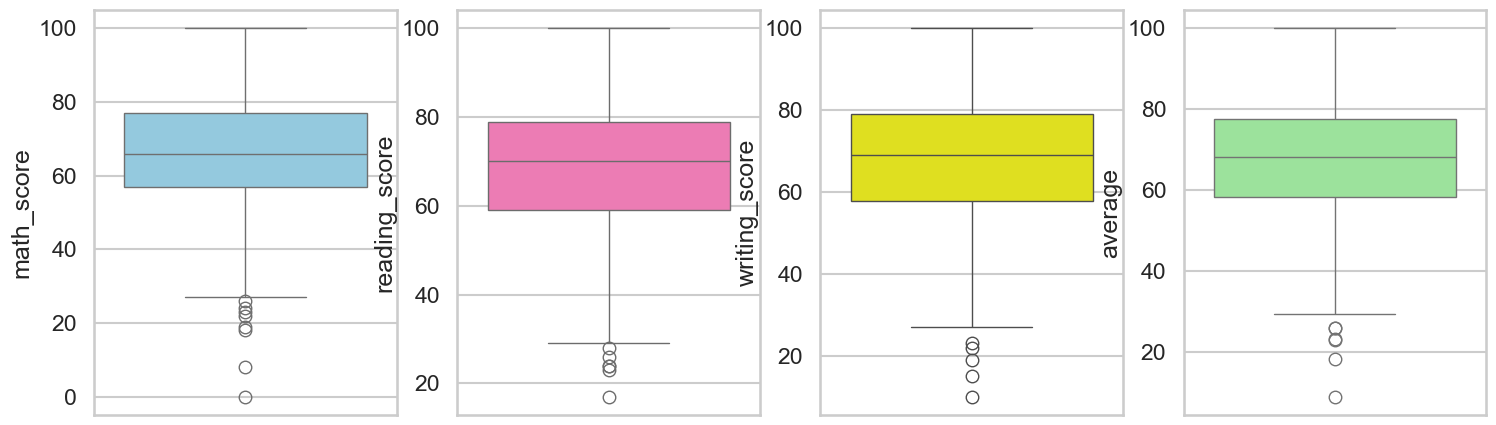

In [34]:
plt.subplots(1,4,figsize=(16,5))
plt.subplot(141)
sns.boxplot(df['math_score'],color='skyblue')
plt.subplot(142)
sns.boxplot(df['reading_score'],color='hotpink')
plt.subplot(143)
sns.boxplot(df['writing_score'],color='yellow')
plt.subplot(144)
sns.boxplot(df['average'],color='lightgreen')
plt.show()

#### MUTIVARIATE ANALYSIS USING PAIRPLOT

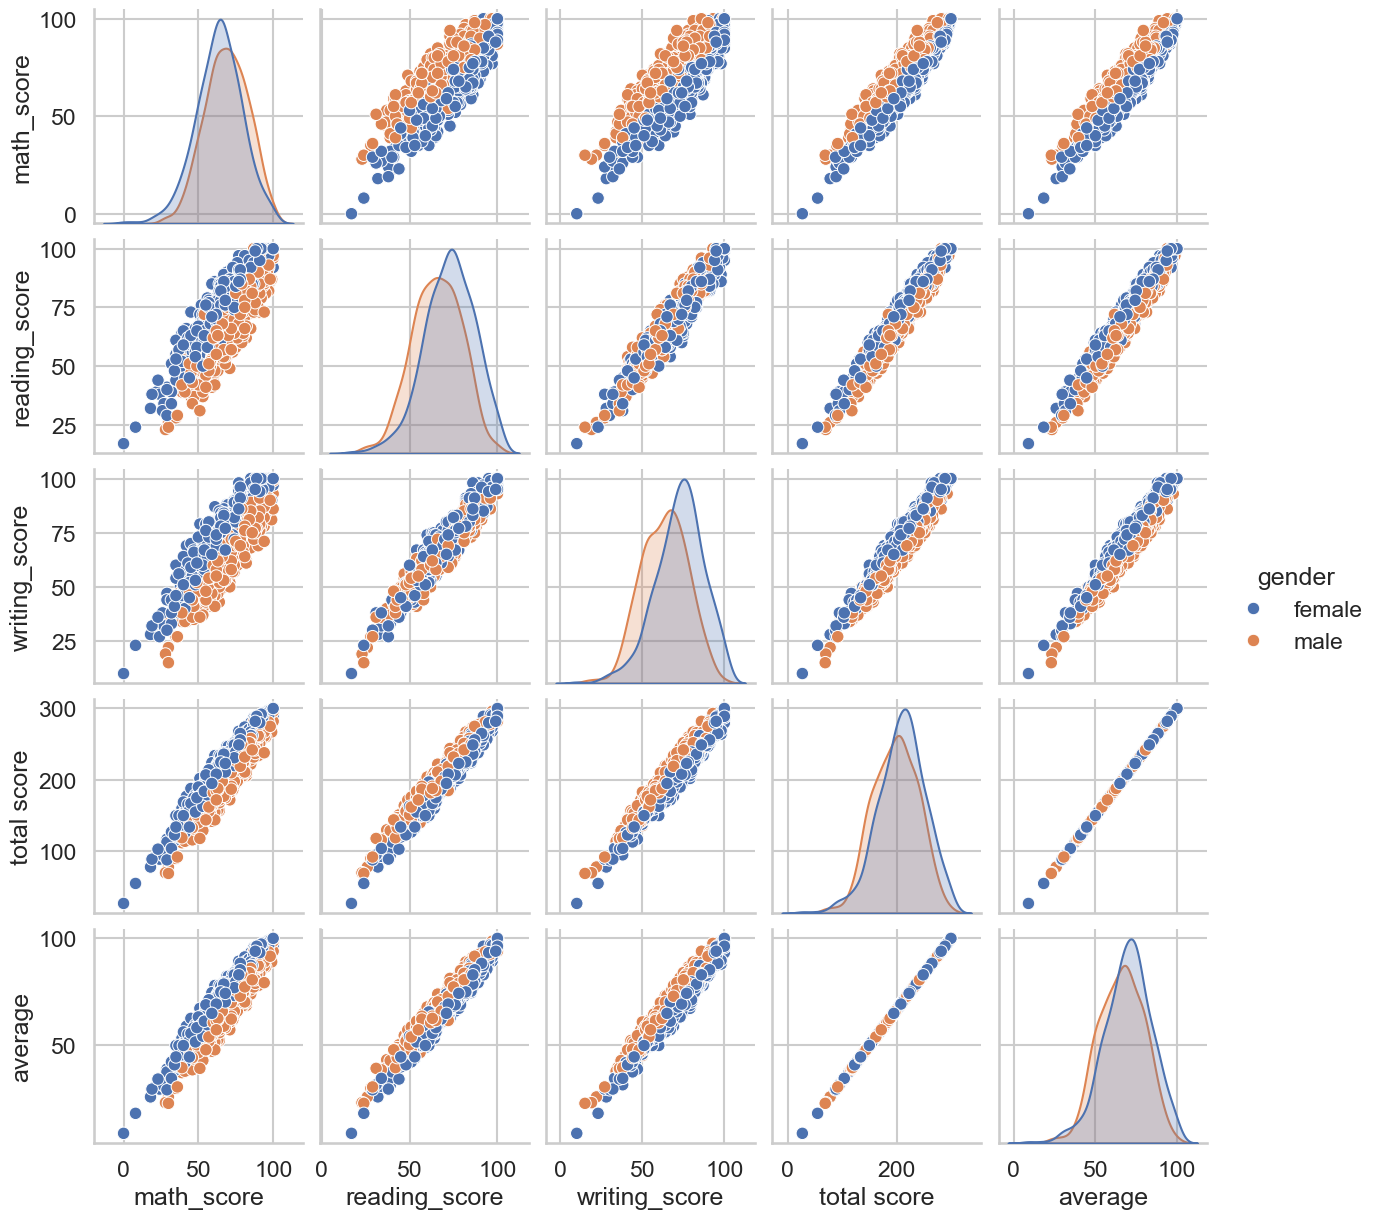

In [35]:
sns.pairplot(df,hue = 'gender')
plt.show()

#### Insight
- From above plot it can be said that the scores increase linearly with each other.

### 6. Conclusions
- Student's Performance is related with lunch, race, parental level education
- Females lead in pass percentage and also are top-scorers
- Student's Performance is not much related with test preparation course
- Finishing preparation course is benefitial.